<a href="https://colab.research.google.com/github/vkaankadae/myrepo/blob/master/Student_Dropout_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Dropout analysis** - 2015 Cohort 4yr Grad Outcome Dataset of NYC schools

In [112]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import squarify

%matplotlib inline

In [113]:
url = 'https://github.com/vkaankadae/myrepo/blob/master/Student_School_data.xlsx?raw=true'
stud_data = pd.read_excel(url)

In [114]:
stud_data.head()

,STUID,District,Gender,Age,Siblings,Disability,Father_edu,Mother_edu,Father_occupation,Mother_occupation,Econmy_Background,Comp_Internet,Distance,Library_use,Subjects,English_Read,Class_Contribution,Forum_Contribution,Maths..,Reading..,Science..,Social..,Attendance,Faculty_Feedback,Dropout
0,26011001001,1,Girl,13.0,1,0.0,Illiterate,Illiterate,Farmer,Farmer,1.0,NaN,1.0,1.0,Mathematics,0,NaN,0.0,NaN,33.33,NaN,NaN,0.78,1,0
1,26011001002,1,Girl,15.0,3,0.0,NaN,Illiterate,Farmer,Farmer,1.0,NaN,1.0,0.0,Mathematics,0,NaN,0.0,NaN,62.07,NaN,NaN,0.40,3,0
2,26011001003,1,Girl,14.0,3,0.0,Degree & above,Illiterate,Farmer,Farmer,2.0,NaN,1.0,1.0,Mathematics,0,NaN,1.0,NaN,41.38,NaN,NaN,0.78,2,0
3,26011001004,1,Boy,13.0,3,0.0,Secondary,Secondary,Farmer,Farmer,2.0,NaN,1.0,2.0,Mathematics,0,1.0,3.0,29.82,NaN,NaN,NaN,0.60,1,0
4,26011001005,1,Girl,14.0,2,0.0,Primary,Illiterate,Farmer,Farmer,1.0,NaN,1.0,0.0,Mathematics,0,1.0,0.0,NaN,NaN,27.27,NaN,0.07,4,0


In [115]:
  stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUID               8785 non-null   int64  
 1   District            8785 non-null   int64  
 2   Gender              8785 non-null   object 
 3   Age                 8553 non-null   float64
 4   Siblings            8785 non-null   int64  
 5   Disability          8290 non-null   float64
 6   Father_edu          8133 non-null   object 
 7   Mother_edu          7937 non-null   object 
 8   Father_occupation   7750 non-null   object 
 9   Mother_occupation   6614 non-null   object 
 10  Econmy_Background   7337 non-null   float64
 11  Comp_Internet       6635 non-null   float64
 12  Distance            8453 non-null   float64
 13  Library_use         8588 non-null   float64
 14  Subjects            8676 non-null   object 
 15  English_Read        8745 non-null   object 
 16  Class_

In [116]:
stud_data[stud_data.duplicated()]

,STUID,District,Gender,Age,Siblings,Disability,Father_edu,Mother_edu,Father_occupation,Mother_occupation,Econmy_Background,Comp_Internet,Distance,Library_use,Subjects,English_Read,Class_Contribution,Forum_Contribution,Maths..,Reading..,Science..,Social..,Attendance,Faculty_Feedback,Dropout


**Correlation**

In [117]:
stud_data.corr()

,STUID,District,Age,Siblings,Disability,Econmy_Background,Comp_Internet,Distance,Library_use,Class_Contribution,Forum_Contribution,Maths..,Reading..,Science..,Social..,Attendance,Faculty_Feedback,Dropout
STUID,1.000000,0.999926,0.026708,-0.075128,-0.007778,0.131153,0.086502,0.041613,-0.179217,0.049782,0.093160,-0.064508,0.176699,0.087731,0.069024,-0.007253,0.018707,0.147459
District,0.999926,1.000000,0.027334,-0.074818,-0.007713,0.130790,0.085637,0.041769,-0.178645,0.049714,0.093132,-0.063986,0.176511,0.088166,0.069265,-0.007338,0.018771,0.146343
Age,0.026708,0.027334,1.000000,0.088443,0.058075,-0.078848,-0.046147,-0.002292,-0.003761,-0.057571,-0.029460,-0.062222,-0.158222,-0.068187,-0.068913,-0.007942,0.004347,0.011545
Siblings,-0.075128,-0.074818,0.088443,1.000000,0.006436,-0.125202,-0.082384,-0.002737,0.045191,-0.047985,-0.038816,-0.090117,-0.135590,-0.083846,-0.063463,0.015948,0.007088,-0.043085
Disability,-0.007778,-0.007713,0.058075,0.006436,1.000000,-0.026916,0.033217,0.001090,-0.015094,-0.019212,0.000892,-0.052154,-0.079608,-0.059735,-0.075315,-0.003574,0.013668,-0.007125
Econmy_Background,0.131153,0.130790,-0.078848,-0.125202,-0.026916,1.000000,0.079513,-0.050523,-0.076806,0.074431,0.081801,0.063765,0.181259,0.112069,0.108455,0.012016,-0.012882,0.042924
Comp_Internet,0.086502,0.085637,-0.046147,-0.082384,0.033217,0.079513,1.000000,0.006373,-0.054078,0.138842,0.059562,0.005899,-0.019805,-0.055248,-0.042346,0.004190,0.012864,0.044369
Distance,0.041613,0.041769,-0.002292,-0.002737,0.001090,-0.050523,0.006373,1.000000,-0.055502,0.019901,-0.010758,-0.072684,-0.031695,-0.022414,-0.028154,-0.027574,0.032747,-0.018575
Library_use,-0.179217,-0.178645,-0.003761,0.045191,-0.015094,-0.076806,-0.054078,-0.055502,1.000000,-0.001890,-0.044070,-0.075766,-0.076164,-0.103205,-0.062931,-0.010808,-0.002835,-0.063326
Class_Contribution,0.049782,0.049714,-0.057571,-0.047985,-0.019212,0.074431,0.138842,0.019901,-0.001890,1.000000,0.143216,0.056102,0.132378,0.087010,0.109315,-0.020187,-0.013245,0.011313


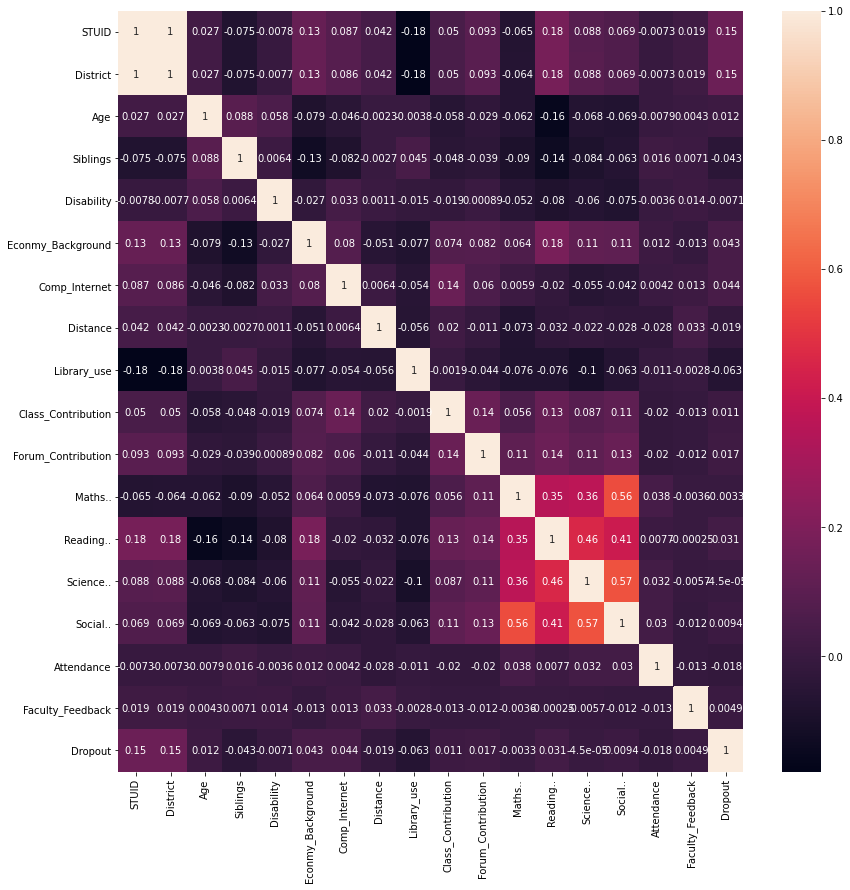

In [118]:
fig, ax = plt.subplots(figsize=(14, 14))
sb.heatmap(stud_data.corr(),annot=True)
plt.show()

**Students group visualization**

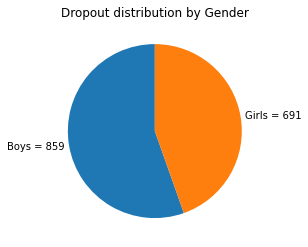

Total Enrolled #  
Boys: 4575   Girls: 4210


In [119]:
# Gender

boy = stud_data[(stud_data.Gender=='Boy')]['Dropout'].sum()
girl = stud_data[(stud_data.Gender=='Girl')]['Dropout'].sum()

pie_data = [boy, girl]
pie_labels = ['Boys = '+ str(boy), 'Girls = '+ str(girl)]

plt.pie(pie_data, labels=pie_labels, labeldistance=1.05, startangle=90)
plt.title('Dropout distribution by Gender')

plt.show()

print('Total Enrolled #  \nBoys:', stud_data[stud_data.Gender=='Boy']['STUID'].count(),  '  Girls:', stud_data[stud_data.Gender=='Girl']['STUID'].count() )



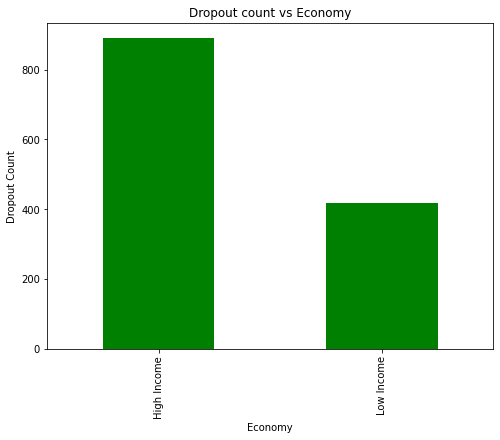

In [120]:
# Economic Background

stud_data['Econmy_Background'] = ['High Income' if val==2 else 'Low Income' if val==1 else None \
                         for val in (stud_data['Econmy_Background'])]

econ = stud_data.groupby('Econmy_Background')['Dropout'].sum()
econ.plot(kind='bar', figsize=(8,6), color='green')

plt.xlabel('Economy')
plt.ylabel('Dropout Count')
plt.title('Dropout count vs Economy')

plt.show()

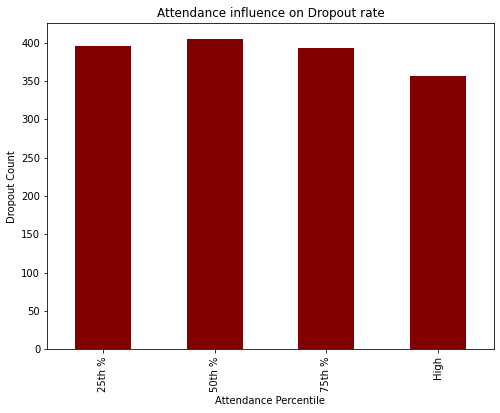

In [121]:
# attendance

stud_data['Attendance Percentile'] = ['25th %' if 0<=val<=0.25 else '50th %' if 0.26<=val<=0.50 else '75th %' if 0.51<=val<=0.75  else 'High' \
                         for val in (stud_data['Attendance'])]

attd_grp = stud_data.groupby('Attendance Percentile')['Dropout'].sum()

attd_grp.plot(kind='bar', figsize=(8,6), color='maroon')

plt.title("Attendance influence on Dropout rate")
plt.xlabel('Attendance Percentile')
plt.ylabel('Dropout Count')
plt.show()


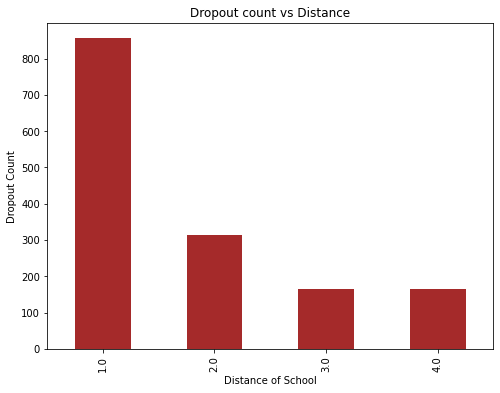

In [171]:
# Distance from home to school

stud_grp = stud_data.groupby('Distance')['Dropout'].sum()

stud_grp.plot(kind='bar', figsize=(8,6), color='brown')

plt.xlabel('Distance of School')
plt.ylabel('Dropout Count')
plt.title('Dropout count vs Distance')

plt.show()

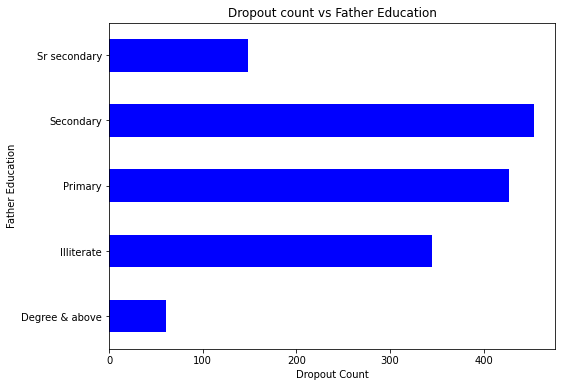

In [160]:
# father education

father_edu = stud_data.groupby('Father_edu')['Dropout'].sum()

father_edu.plot(kind='barh', figsize=(8,6), color='blue')

plt.ylabel('Father Education')
plt.xlabel('Dropout Count')
plt.title('Dropout count vs Father Education')

plt.show()

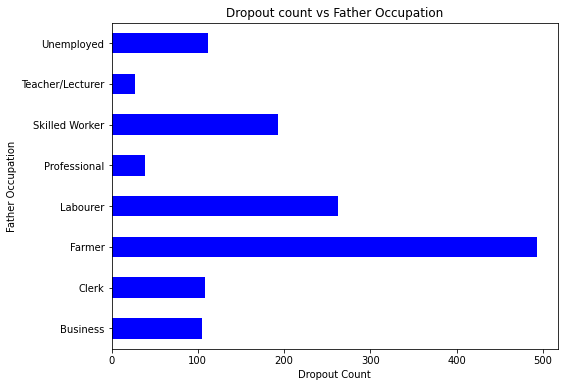

In [162]:
# father occupation

father_occ = stud_data.groupby('Father_occupation')['Dropout'].sum()

father_occ.plot(kind='barh', figsize=(8,6), color='blue')

plt.ylabel('Father Occupation')
plt.xlabel('Dropout Count')
plt.title('Dropout count vs Father Occupation')

plt.show()

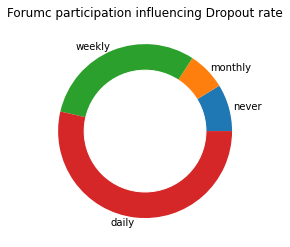

In [128]:
# forum contribution

never = stud_data[(stud_data['Forum_Contribution'] == 0)]['Dropout'].sum()
monthly = stud_data[(stud_data['Forum_Contribution'] == 1)]['Dropout'].sum()
weekly = stud_data[(stud_data['Forum_Contribution'] == 2)]['Dropout'].sum()
daily = stud_data[(stud_data['Forum_Contribution'] == 3)]['Dropout'].sum()

pie_data = [never, monthly, weekly, daily]
pie_labels = ['never','monthly','weekly','daily']

plt.pie(pie_data, labels=pie_labels, labeldistance=1.05)

plt.title("Forumc participation influencing Dropout rate")

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

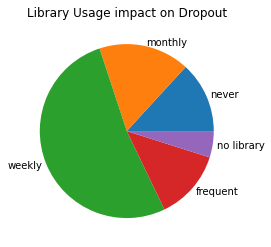

In [127]:
# Library Use

never = stud_data[(stud_data['Library_use'] == 0)]['Dropout'].sum()
monthly = stud_data[(stud_data['Library_use'] == 1)]['Dropout'].sum()
weekly = stud_data[(stud_data['Library_use'] == 2)]['Dropout'].sum()
frequent = stud_data[(stud_data['Library_use'] == 3)]['Dropout'].sum()
nolibrary = stud_data[(stud_data['Library_use'] == 99)]['Dropout'].sum()

pie_data = [never, monthly, weekly, frequent, nolibrary]
pie_labels = ['never','monthly','weekly','frequent', 'no library']

plt.pie(pie_data, labels=pie_labels, labeldistance=1.05)
plt.title('Library Usage impact on Dropout')

plt.show()

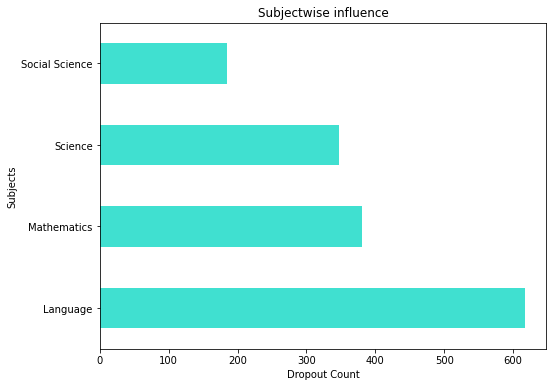

In [170]:
# Subjects

subject = stud_data.groupby('Subjects')['Dropout'].sum()

subject.plot(kind='barh', figsize=(8,6), color='turquoise')

#sb.barplot(stud_data['Subjects'], stud_data['Dropout'].sum())

#plt.barh(attd_lib,stud_data['Attendance']*100)

plt.title('Subjectwise influence')
plt.xlabel('Dropout Count')
plt.ylabel('Subjects')
plt.show()


No handles with labels found to put in legend.


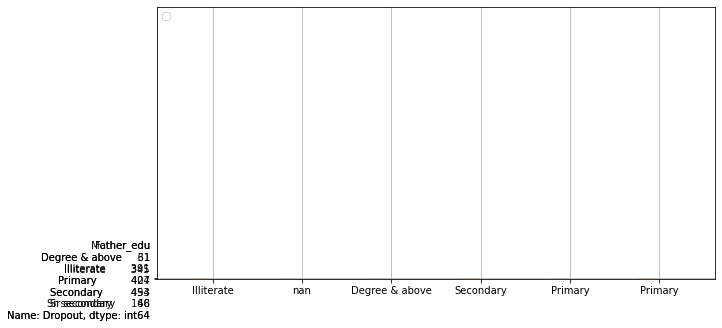

In [ ]:
#

father_edu = stud_data.groupby('Father_edu')['Dropout'].sum()
mother_edu = stud_data.groupby('Mother_edu')['Dropout'].sum()

# Setting the positions and width for the bars
pos = np.arange(len(stud_data['Father_edu'].unique()))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data
plt.bar(pos, str(father_edu), width, alpha=0.5, color='#EE3224')
#plt.show()

# Create a bar with mid_score data,
plt.bar([p + width for p in pos], str(mother_edu), width, alpha=0.5, color='#F78F1E')
#plt.show()

# Create a bar with post_score data,
#plt.bar([p + width*2 for p in pos], df['post_score'], width, alpha=0.5, color='#FFC222')
#plt.show()

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(stud_data['Father_edu'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(father_edu + mother_edu)] )

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid()
plt.show()